# Preprocessing and plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('tv_shows.csv', index_col=0)
df

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


In [3]:
#Change colum names to ease the analysis
df.columns = ['title', 'year', 'age', 'IMDb', 'rotten', 'netflix', 'hulu', 'prime', 'disney', 'type']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5611 entries, 0 to 5610
Data columns (total 10 columns):
title      5611 non-null object
year       5611 non-null int64
age        3165 non-null object
IMDb       4450 non-null float64
rotten     1011 non-null object
netflix    5611 non-null int64
hulu       5611 non-null int64
prime      5611 non-null int64
disney     5611 non-null int64
type       5611 non-null int64
dtypes: float64(1), int64(6), object(3)
memory usage: 482.2+ KB


In [5]:
df.title.value_counts().sort_values(ascending=False).head(45)

Kingdom                     3
Undercover                  3
The Kennedys                2
Jane Eyre                   2
DuckTales                   2
The Outer Limits            2
American Gladiators         2
The Baker and the Beauty    2
Rome                        2
Elizabeth I                 2
Ben 10                      2
Danger Mouse                2
Wilfred                     2
The Good Cop                2
Fearless                    2
Maniac                      2
The Librarians              2
Kojak                       2
Melrose Place               2
Summertime                  2
Frequency                   2
Inspector Gadget            2
Max Steel                   2
Fresh Off the Boat          2
Marco Polo                  2
American Gothic             2
The Office                  2
Shameless                   2
Baby Daddy                  2
Party of Five               2
Baby Talk                   2
Fruits Basket               2
Westside                    2
Abandoned 

In [6]:
df[df.title=='Moby Dick']

,title,year,age,IMDb,rotten,netflix,hulu,prime,disney,type
3981,Moby Dick,1998,7+,6.4,75%,0,0,1,0,1
4032,Moby Dick,2011,18+,6.2,NaN,0,0,1,0,1


Some title are repeted, however I can assure that there is not a single repeted serie as they date from different years.

In [7]:
df.type.value_counts()

1    5611
Name: type, dtype: int64

## Dropping features

+ The *type* feature is suposed to label whether a title is a movie or a serie, yet in this dataset all entries are series.

+ There two different **ratings** from diferent platforms (i.e. *IMDb* and *Rotten Tomatoes*). Eventhough both ratings have missing values, the ones coming from *Rotten Tomates* have more null values. I was thinking on combining both ratings to have fewer missing ratings in total, but the ratings are computed diferently in both platfomrs. Generally the tv shows are rated with higher scores in *Rotten Tomatoes* . 

In [8]:
df.drop('type', axis=1, inplace=True)

In [9]:
def obj_to_int(x):
    '''
    Converts a string value into a number.
    If the string is a percentage value it returns a float from 0 to 10.
    x is a string value
    '''
    if isinstance(x, str):
        rate = float(x.strip('%'))
        return rate/10
    
df['rotten'] = df['rotten'].apply(obj_to_int)

In [10]:
df.rotten

0       9.6
1       9.3
2       9.1
3       7.8
4       9.7
       ... 
5606    NaN
5607    NaN
5608    NaN
5609    NaN
5610    NaN
Name: rotten, Length: 5611, dtype: float64

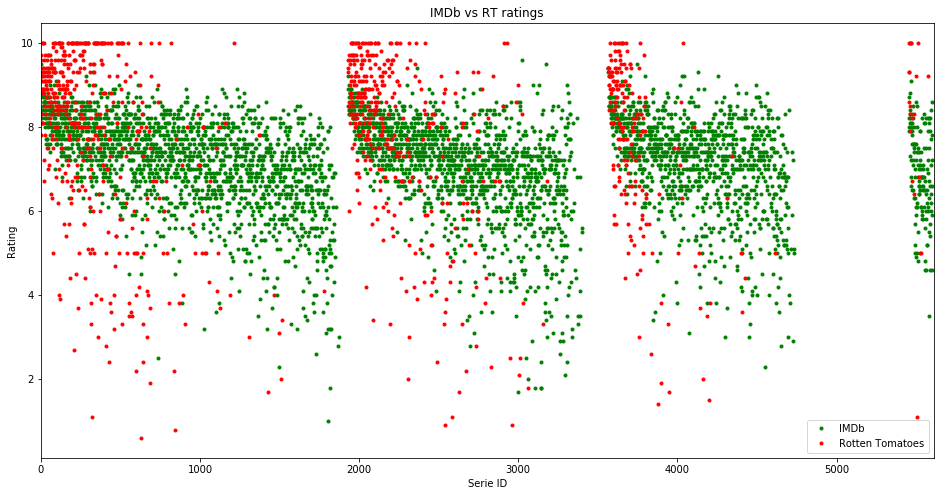

In [11]:
#To have an idea of how the ratings of both platforms are distributed and compare them

df['IMDb'].plot(marker='.', figsize=(16,8), linewidth=0, color='g')
df['rotten'].plot(marker='.', linewidth=0, color='r', label='Rotten Tomatoes')
plt.xlabel('Serie ID')
plt.ylabel('Rating')
plt.title('IMDb vs RT ratings')
plt.legend()
plt.show()

In [12]:
df2 = df.drop('rotten', axis=1).copy()

## Missing Ratings

+ Initially I thought the missing ratings would come from the last released series. However, the number of rated and not rated tv_shows is proportionaly distributed in time so the fact of not being rated must depend on another factor.


+ Both in the description of the data and in the histograms bellow we see that the series found in Prime Video are the ones with higher amount of not rated series. Maybe the problem resides in the fact that *Prime Video* users do not use *IMDb* to rate what they watch. A solution could be to take the ratings from Prime Video directly, but this would creat a bias as all the ratings should come from the same source. As far as I know the equation used to compute *IMDb's* ratings requires a minimum number of people rating that one TV Show, which if it's not passed the serie appears as not rated.

This analysis has been done to understand where the problem comes from and try to fix over time. The not rated series are not going to be erased from the dataset, yet the users will find that there is no rating for the mentioned ones. 

In [13]:
df2.columns = ['Title', 'Year', 'Target Age', 'Rate', 'Netflix', 'Hulu', 'Prime Video', 'Disney+']

In [14]:
platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

def get_platform(row):
    l = list()
    for platform in platforms:
        if row[platform] == 1:
            l.append(platform)
    return list(l)
        
df2['Platforms'] = df2.apply(get_platform, axis=1)

In [15]:

def value_in(entry, platform='Hulu'):
    '''
    Selecting a specific platform this functions applyed to the platforms column
    returns a dataframe with all series in this particular platform
    '''
    if platform in entry:
        return True
    return False
    
df2[df2.Platforms.apply(value_in)]

,Title,Year,Target Age,Rate,Netflix,Hulu,Prime Video,Disney+,Platforms
13,Attack on Titan,2013,16+,8.8,1,1,0,0,"[Netflix, Hulu]"
15,Fullmetal Alchemist: Brotherhood,2009,18+,9.1,1,1,0,0,"[Netflix, Hulu]"
16,Community,2009,7+,8.5,1,1,0,0,"[Netflix, Hulu]"
18,Parks and Recreation,2009,16+,8.6,1,1,1,0,"[Netflix, Hulu, Prime Video]"
22,Twin Peaks,1990,18+,8.8,1,1,0,0,"[Netflix, Hulu]"
...,...,...,...,...,...,...,...,...,...
3561,Newsy,2016,NaN,NaN,0,1,0,0,[Hulu]
3562,Modd Couples,2016,NaN,NaN,0,1,0,0,[Hulu]
3563,Fantasy Forecast,2016,NaN,NaN,0,1,0,0,[Hulu]
3564,Secret Talent Theatre,2016,NaN,NaN,0,1,0,0,[Hulu]


In [16]:
df2['Hulu'].sum()

1754

In [17]:
not_rated = df2[df2.Rate.isna()==True].drop('Rate', axis=1)
not_rated.describe()

,Year,Netflix,Hulu,Prime Video,Disney+
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000
mean,2012.561585,0.103359,0.204134,0.720930,0.009475
std,10.887427,0.304559,0.403241,0.448735,0.096917
min,1901.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.000000,0.000000,1.000000,0.000000
75%,2017.000000,0.000000,0.000000,1.000000,0.000000
max,2020.000000,1.000000,1.000000,1.000000,1.000000


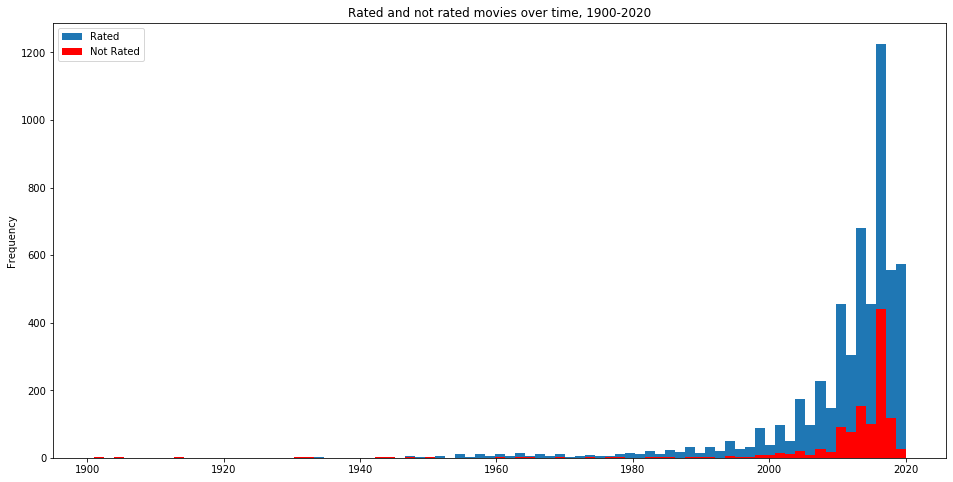

In [18]:
num_years = df2.Year.unique().size
num_years
df2.Year.plot.hist(bins=num_years, figsize=(16,8), label='Rated')
not_rated.Year.plot.hist(bins=num_years, color='r', label='Not Rated')
# plt.xlim((1940, 2020))
plt.title('Rated and not rated movies over time, 1900-2020')
plt.legend()
plt.show()

In [19]:
# I add this two new features to ease the anlysis of the series that are not rated and the ones not labeled with a target age
# I belive that there can be some relation between this to characteristics

df2['not rated'] = df2.Rate.isna()
df2['no age'] = df2['Target Age'].isna()
df2

,Title,Year,Target Age,Rate,Netflix,Hulu,Prime Video,Disney+,Platforms,not rated,no age
0,Breaking Bad,2008,18+,9.5,1,0,0,0,[Netflix],False,False
1,Stranger Things,2016,16+,8.8,1,0,0,0,[Netflix],False,False
2,Money Heist,2017,18+,8.4,1,0,0,0,[Netflix],False,False
3,Sherlock,2010,16+,9.1,1,0,0,0,[Netflix],False,False
4,Better Call Saul,2015,18+,8.7,1,0,0,0,[Netflix],False,False
...,...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,0,0,0,1,[Disney+],True,True
5607,Paradise Islands,2017,NaN,NaN,0,0,0,1,[Disney+],True,True
5608,Wild Russia,2018,NaN,NaN,0,0,0,1,[Disney+],True,True
5609,Love & Vets,2017,NaN,NaN,0,0,0,1,[Disney+],True,True


In [20]:
print(df2['Target Age'].unique())
df2[df2['Target Age'].isna()==True]

['18+' '16+' '7+' nan 'all' '13+']


,Title,Year,Target Age,Rate,Netflix,Hulu,Prime Video,Disney+,Platforms,not rated,no age
172,Feel Good,2020,NaN,7.5,1,0,0,0,[Netflix],False,True
189,Delhi Crime,2019,NaN,8.5,1,0,0,0,[Netflix],False,True
245,Better Than Us,2018,NaN,7.4,1,0,0,0,[Netflix],False,True
256,The Innocence Files,2020,NaN,8.0,1,0,0,0,[Netflix],False,True
282,Yeh Meri Family,2018,NaN,9.2,1,0,0,0,[Netflix],False,True
...,...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,0,0,0,1,[Disney+],True,True
5607,Paradise Islands,2017,NaN,NaN,0,0,0,1,[Disney+],True,True
5608,Wild Russia,2018,NaN,NaN,0,0,0,1,[Disney+],True,True
5609,Love & Vets,2017,NaN,NaN,0,0,0,1,[Disney+],True,True


In [21]:
data = df2.drop(columns=['not rated','no age'], axis=1).copy()
data.to_csv('clean_data.csv')

## Plots

In [22]:
data

,Title,Year,Target Age,Rate,Netflix,Hulu,Prime Video,Disney+,Platforms
0,Breaking Bad,2008,18+,9.5,1,0,0,0,[Netflix]
1,Stranger Things,2016,16+,8.8,1,0,0,0,[Netflix]
2,Money Heist,2017,18+,8.4,1,0,0,0,[Netflix]
3,Sherlock,2010,16+,9.1,1,0,0,0,[Netflix]
4,Better Call Saul,2015,18+,8.7,1,0,0,0,[Netflix]
...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,0,0,0,1,[Disney+]
5607,Paradise Islands,2017,NaN,NaN,0,0,0,1,[Disney+]
5608,Wild Russia,2018,NaN,NaN,0,0,0,1,[Disney+]
5609,Love & Vets,2017,NaN,NaN,0,0,0,1,[Disney+]


In [23]:
data['Target Age'] = data['Target Age'].apply(lambda x: 'Not Defined' if not isinstance(x,str) else x)
data['Target Age'].value_counts()

Not Defined    2446
16+            1018
7+              848
18+             750
all             545
13+               4
Name: Target Age, dtype: int64

In [24]:
data['Rate to show'] = data['Rate'].apply(lambda x: 'Not Defined' if math.isnan(x) else round(x,2))
data['Rate']

0       9.5
1       8.8
2       8.4
3       9.1
4       8.7
       ... 
5606    NaN
5607    NaN
5608    NaN
5609    NaN
5610    NaN
Name: Rate, Length: 5611, dtype: float64

### Relation between Target Age and Rating
##### Scatter Plot
##### Violin Plot

In [25]:
target_order = ['all', '7+', '13+', '16+', '18+', 'Not Defined']

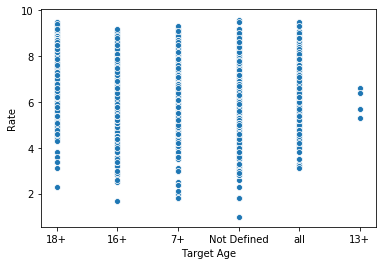

In [26]:
sns.scatterplot(data=data, x='Target Age', y='Rate')

Text(0.5, 1.0, 'Distribution of Ratings for each Target Age')

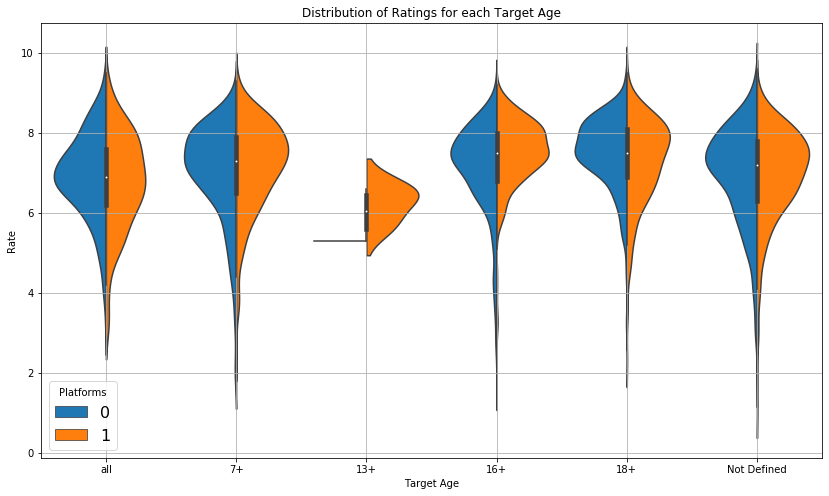

In [27]:
grid=True
# sns.scatterplot(data=data, x="Target Age", y="Rate", order=target_order)
plt.figure(figsize=(14,8))
sns.violinplot(data=data, x="Target Age", y="Rate", hue='Netflix',
                    order=target_order, split=True,
                   inner='box', saturation=10,
              labels=['a','b'])
plt.grid(grid)

plt.legend(prop={'size': 16}, title = 'Platforms')

plt.title('Distribution of Ratings for each Target Age')


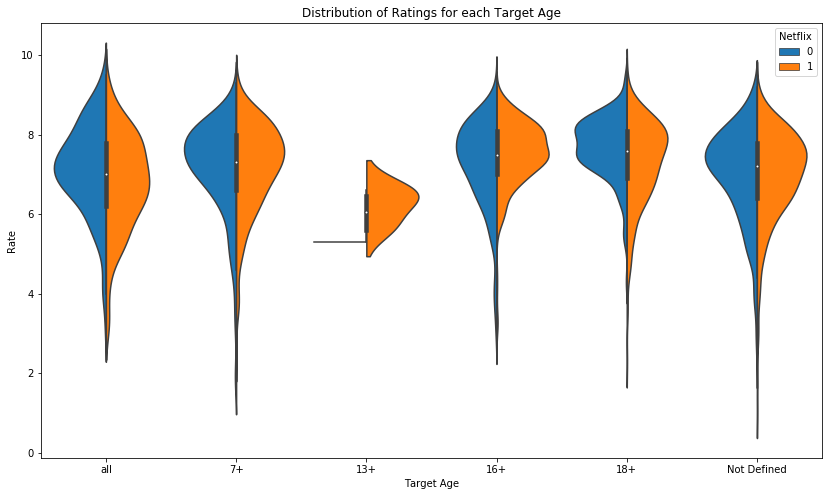

In [28]:
def vio(data,  platform, grid=False, split=False):
    '''
    Creates a violinplot with seaborn
    grid: can be selected from the appweb with a checkbox
    platform: will be the first platform selected
    split: If two platforms are selected, it allows to have both violin distributions in the same plot
    returns a violin plot of the distribution of rates per target age. 
    '''
    target_order = ['all', '7+', '13+', '16+', '18+', 'Not Defined']
    fig = plt.figure(figsize=(14,8))
    ax = sns.violinplot(data=data, x="Target Age", y="Rate", hue=platform,
                        order=target_order, split=split,
                       inner='box', saturation=10,)
    plt.grid(grid)
    plt.title('Distribution of Ratings for each Target Age')
#     plt.legend()
    return plt.show()
d = data[(data['Netflix']==1) | (data['Prime Video']==1)]
vio(d, 'Netflix',split=True)

In [29]:
(data[data.Netflix==0]['Target Age']=='13+').sum()

1

### Relation Released Years Vs. Ratings
##### Scatter Plot

In [30]:
rated = data[data.Rate.notnull()]
rated.Year.value_counts().sort_index()

1934      1
1947      2
1948      1
1949      1
1950      1
       ... 
2016    397
2017    388
2018    438
2019    375
2020    171
Name: Year, Length: 74, dtype: int64

In [31]:
np.linspace(data.Year.min()-1,data.Year.max(), 13, retstep=True)
# help(np.linspace)

(array([1900., 1910., 1920., 1930., 1940., 1950., 1960., 1970., 1980.,
        1990., 2000., 2010., 2020.]), 10.0)

In [32]:
years = rated.Year.unique()
years.sort()
len(years)/6
years.min()

1934

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


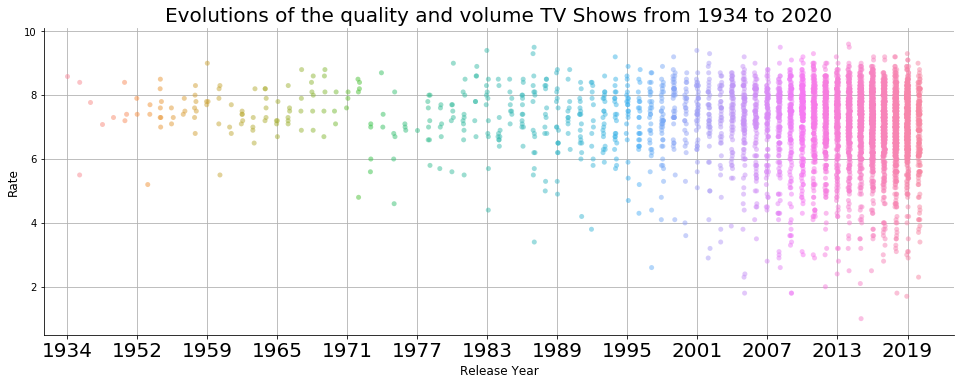

In [33]:
years = rated.Year.unique()
years.sort()
num_years = len(years)
year_space=6
data = data

title_size=20
label_size=12

ax=sns.catplot(data=rated, x="Year", y="Rate",size=5, alpha=0.5,
            height=6,aspect=2.7) 
plt.xticks(range(0,num_years,year_space), years[::year_space])
plt.title('Evolutions of the quality and volume TV Shows from 1934 to 2020', size=title_size)
plt.xlabel('Release Year', size=label_size)
plt.xlim(-2,76)
plt.ylabel('Rate', size=label_size)
plt.grid(True)
plt.xticks(fontsize=20)

plt.show()

## Histogram

1. Select an appropiate number of bins or binwidth
2. Select the type of comparison in case we have two platforms
3. Aproximate with a density function
    + Using **distplot( )** function from seaborn, the y-axis is in terms of density, and the histogram is normalized by default so that it has the same y-scale as the density plot.
    + Regardint the density function I will use the default kernel, Gaussian, and the default bandwidth estimation which I think in this case works well. The bandwidth controls the smoothness of the density function.

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


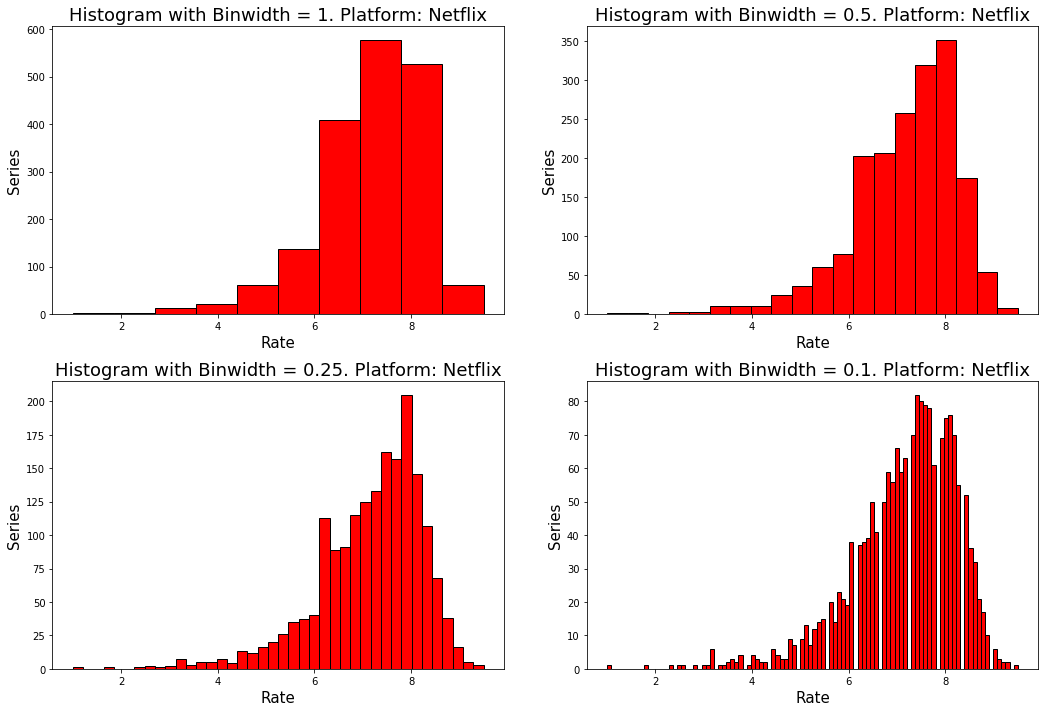

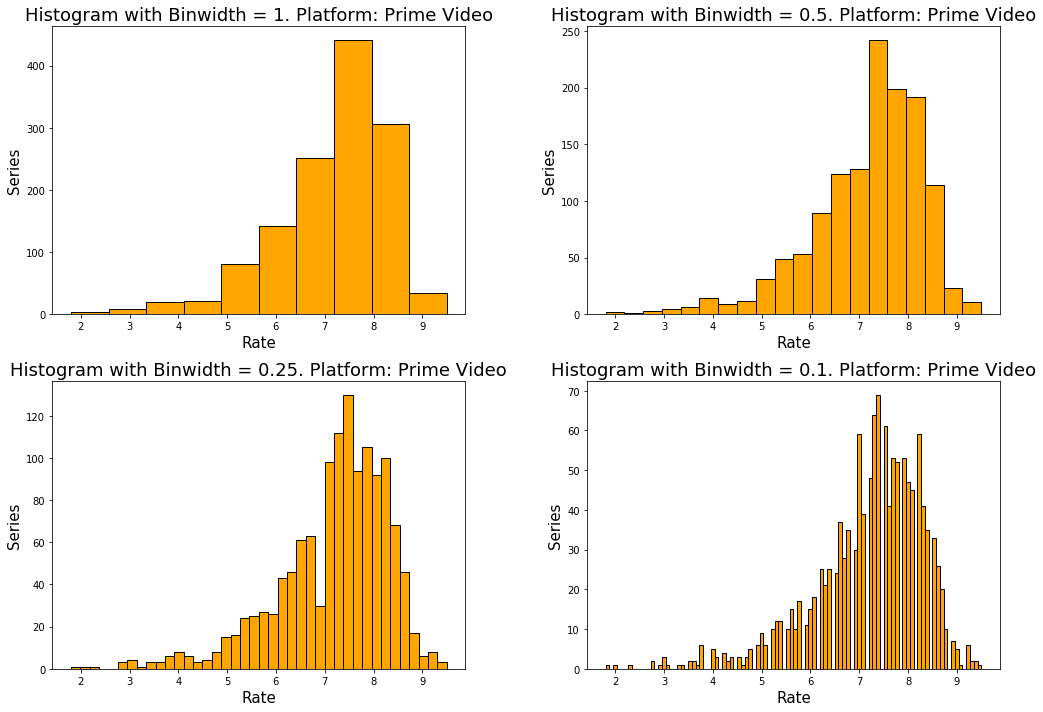

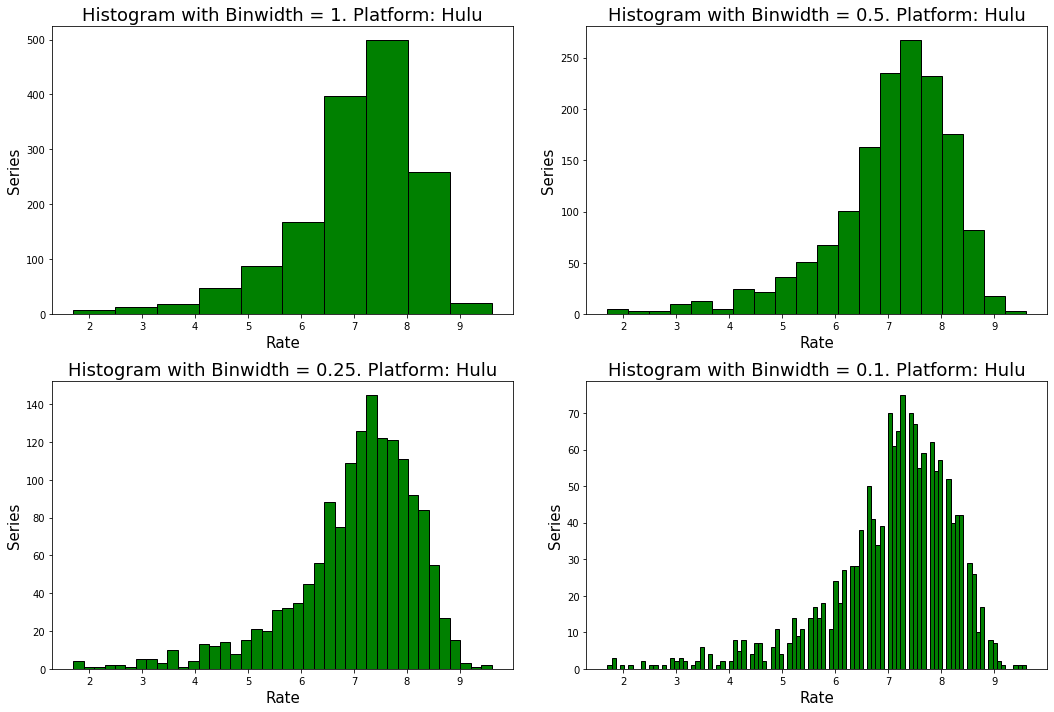

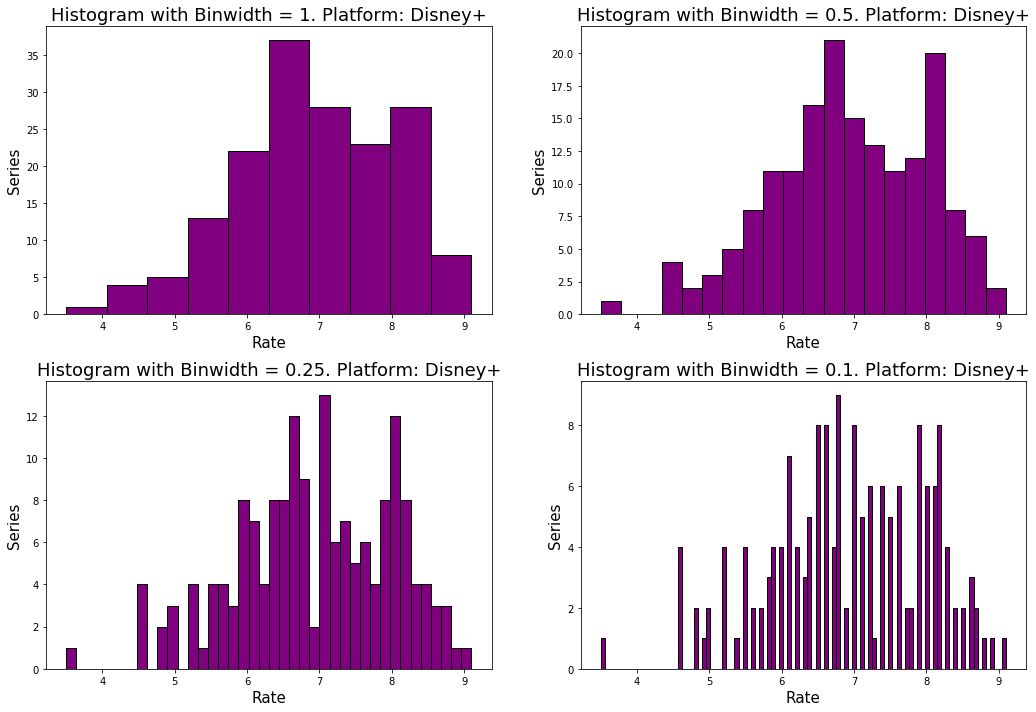

In [34]:
platforms = {'Netflix':'r', 'Prime Video':'orange', 'Hulu':'green', 'Disney+':'purple'}
for plat in platforms:
    platform = data[data[plat]==1]
    color = platforms[plat]
    plt.figure(figsize=(15,10))

    for i, binwidth in enumerate([1, 0.5, 0.25, 0.1]):

        # Set up the plot
        ax = plt.subplot(2, 2, i + 1)

        # Draw the plot
        ax.hist(platform['Rate'], bins = int(10/binwidth),
                 color = color, edgecolor = 'black')

        # Title and labels
        ax.set_title('Histogram with Binwidth = {}. Platform: {}'.format(binwidth,plat), size = 18)
        ax.set_xlabel('Rate', size = 15)
        ax.set_ylabel('Series', size= 15)

    plt.tight_layout()
    plt.show()

Regarding Hulu and Netflix the binwidth of 0.25 seems acceptable, yet specialy with *Disney+* this histogram goes in to too much detail creating some empty bins. In order to estimate a density function for the histograms a binwidth of 0.5 is best suited.

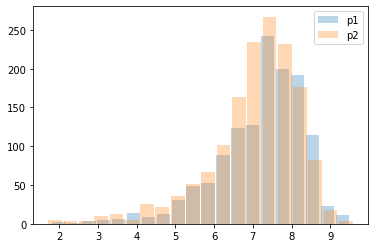

In [35]:
#Histogram
net = data[data['Prime Video']==1]
prime = data[data['Hulu']==1]
plt.hist(x=net.Rate, bins=20, rwidth=0.9, align='mid', alpha=0.3, label='p1')
plt.hist(x=prime.Rate, bins=20, rwidth=0.9, align='mid', alpha=0.3, label='p2')
plt.legend()
plt.show()
# help(plt.hist)

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


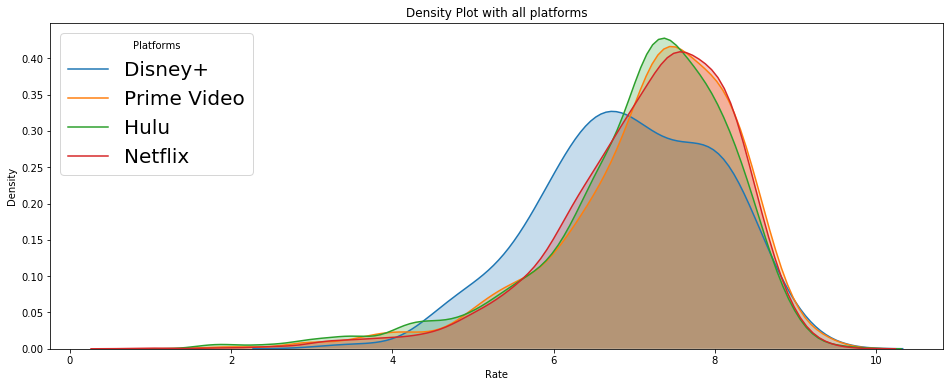

In [36]:
#Density Funtion Aproximation
platforms = ['Disney+', 'Prime Video', 'Hulu', 'Netflix']
plt.figure(figsize=(16,6))
net = ['Netflix']
# Iterate through the platforms
for platform in platforms:
    subset = data[data[platform] == 1]
    
    # Draw the density plot
    sns.distplot(subset['Rate'], hist = False, kde = True,
                 kde_kws = {'shade':'fill'},
                 label = platform)
    
# Plot formatting
plt.legend(prop={'size': 20}, title = 'Platforms')
plt.title('Density Plot with all platforms')
plt.xlabel('Rate')
plt.ylabel('Density')
plt.show()

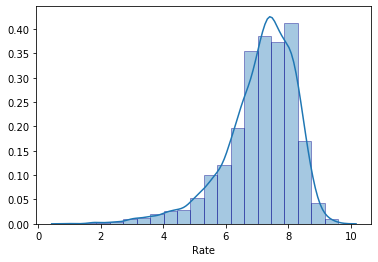

In [37]:
sns.distplot(rated.Rate, bins=int(10/0.5), hist=True,
            hist_kws={'edgecolor':'darkblue'})

In [38]:
r=rated.Rate.unique()
r.sort()
r

array([1. , 1.7, 1.8, 2. , 2.1, 2.3, 2.4, 2.5, 2.6, 2.8, 2.9, 3. , 3.1,
       3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4,
       4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7,
       5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ,
       7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3,
       8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6])

In [39]:
data.rename(columns={'Rating to show':'Rating '},inplace=True)
data

,Title,Year,Target Age,Rate,Netflix,Hulu,Prime Video,Disney+,Platforms,Rate to show
0,Breaking Bad,2008,18+,9.5,1,0,0,0,[Netflix],9.5
1,Stranger Things,2016,16+,8.8,1,0,0,0,[Netflix],8.8
2,Money Heist,2017,18+,8.4,1,0,0,0,[Netflix],8.4
3,Sherlock,2010,16+,9.1,1,0,0,0,[Netflix],9.1
4,Better Call Saul,2015,18+,8.7,1,0,0,0,[Netflix],8.7
...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,Not Defined,NaN,0,0,0,1,[Disney+],Not Defined
5607,Paradise Islands,2017,Not Defined,NaN,0,0,0,1,[Disney+],Not Defined
5608,Wild Russia,2018,Not Defined,NaN,0,0,0,1,[Disney+],Not Defined
5609,Love & Vets,2017,Not Defined,NaN,0,0,0,1,[Disney+],Not Defined
